<a href="https://colab.research.google.com/github/DiannaKatayama/Data_Science_Projeto_I/blob/main/Aplicando_Aula_8_Aquis_Prep_Dad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As colunas desse dataset são:



*   Pessenger ID: ID do passageiro (número único para cada um dos passageiros)
*   Suvived: Sobrevivente (0 = Não, 1 = Sim)
*   Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
*   Name: Nome do passageiro
*   Sex: Gênero do passageiro
*   Age: Idade (em anos) do passageiro
*   SibSp: Número de irmãos/ cônjuges a bordo do Titanic
*   Parch: Número de pais/ filhos a bordo do Titanic
*   Ticket: Número do ticket
*   Fare: Tarifa da passagem
*   Cabin: Número da cabine
*   Embarked: Ponto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)



Segue pipeline para o processo de limpeza e preparação dos dados:

* Importação das bibliotecas
* Carregamento da base de dados
* Análise inicial
* Tratamento de Dados Ausentes
* Transformação de Dados
* Seleção de Atributos
* Codificação de Variáveis Categóricas
* Armazenamento em novo dataFrame.

In [110]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#Importando a base de dados
base = pd.read_csv('train.csv')

In [142]:
#Visualizando as 3 primeiras linhas
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [143]:
#Visualizando as 3 últimas linhas
base.tail(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [144]:
#Verificando o tamanho da base
base.shape

(891, 12)

 **Visualizando um resumo das informações**

In [145]:
display(base)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [146]:
#Verificando as informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
#Contando a quantidade de valores nulos
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [148]:
#Verificando as insformações estatíticas
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count: Mostra os valores não nulos.

Mean: Mostra a média dos valores de cada coluna.

std: Desvio padrão, que é uma medida de quão dispersos os valores são em relação à média. Valores maiores de desvio padrão indicam maior dispersão dos dados.

min: Mostra o valor mínimo em cada coluna.

25%: Mostra o primeiro quartil, que é o valor abaixo do qual cai o 25% dos menores valores. É um indicador útil para entender a distribuição dos valores mais baixos na coluna.

50%: Mostra a mediana, que é o valor que separa a metade inferior da metade superior dos dados quando eles estão classificados em ordem crescente. A mediana é uma medida de tendência central que é menos sensível a valores extremos do que a média.

75%: Mostra o terceiro quartil, ou seja, o valor abaixo do qual cai o 75% dos menores valores. É um indicador útil para entender a distribuição dos valores mais baixos e médios na coluna.

max: Mostra o valor máximo de cada coluna.

In [149]:
#Verificando a quantidade de valores únicos
base.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Transformação dos dados

In [150]:
# DataFrame de exemplo
data = {'Sex': ['male', 'female', 'male', 'male', 'female']}
df = pd.DataFrame(data)

# Mapeamento dos valores da coluna "Sex" para inteiros
mapeamento = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(mapeamento)

# O DataFrame agora terá a coluna "Sex" transformada em valores inteiros
print(df)

   Sex
0    1
1    0
2    1
3    1
4    0


Transformação realizada, porém utilizaremos na análise exploratória. Por isso realizei em um dataframe separado.

**Visualizando de forma gráfica**

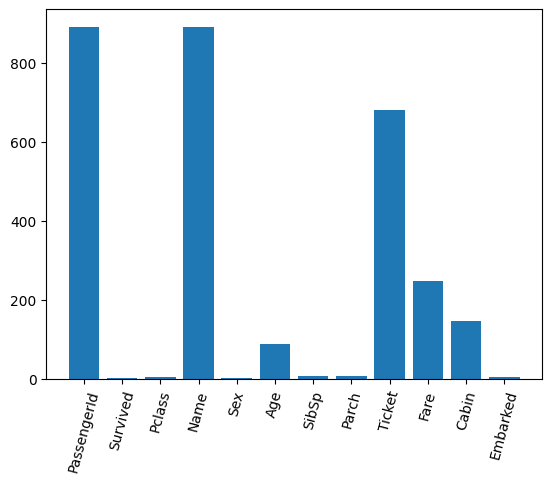

In [151]:
#Visualizando a informação de forma gráfica
fig,ax = plt.subplots()

ax.bar(base.nunique().index, base.nunique().values)

ax.tick_params(axis='x',labelrotation=75)
plt.show()

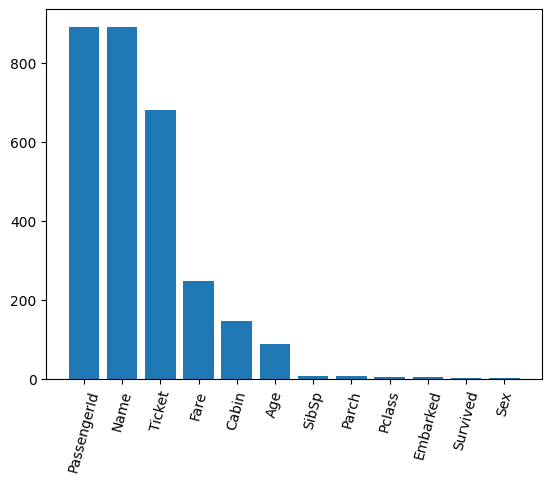

In [152]:
#Visulaizando a informação de forma gráfica decrescente
fig,ax = plt.subplots()

ax.bar(base.nunique().sort_values(ascending=False).index, base.nunique().sort_values(ascending=False).values)

ax.tick_params(axis='x',labelrotation=75)
plt.show()

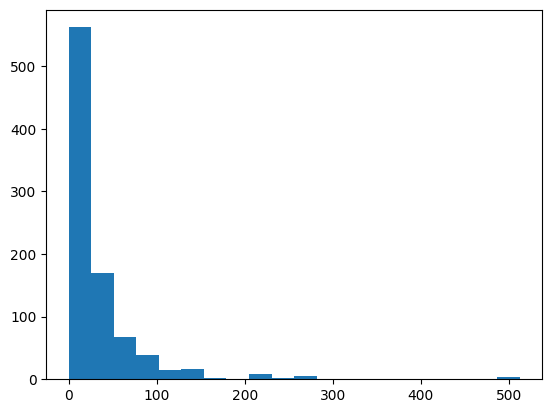

In [153]:
#Verificando o histograma das tarifas
fig, ax = plt.subplots()

ax.hist(base.Fare, bins = 20)

plt.show()


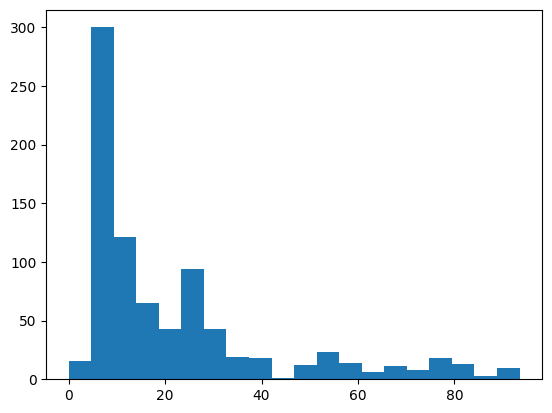

In [154]:
#Verificando o histograma das tarifas menores que 100
fig, ax = plt.subplots()

ax.hist(base[base.Fare <100].Fare, bins = 20)

plt.show()


Para a taxa, existe uma concentração muito grande de valores pequenos e poucas observações de passagens muito caras
* Além disso, 15 passagens estão com valor igual a 0 (zero)

In [155]:
base[base.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [156]:
#Acessando qualquer um dos valores do .describe()
base.Fare.describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [157]:
#Determinando o interquartil
Q1 = base.Fare.describe()['25%']
Q3 = base.Fare.describe()['75%']
interquartil = Q3 - Q1

#Calculando o valor máximo
vlr_max = Q3 + 1.5*interquartil

In [158]:
#Filtrando os valores acima do máximo
base[base.Fare > vlr_max]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [159]:
#Contando o número de linhas da base
base.shape

(891, 12)

In [160]:
#Verificando a quantidade de registros em cada intervalo (Q1, entre Q1 e Q2, entre Q2 e Q3, >Q3)
Q2 = base.Fare.describe()['50%']
base[(base.Fare > Q2) & (base.Fare < Q3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


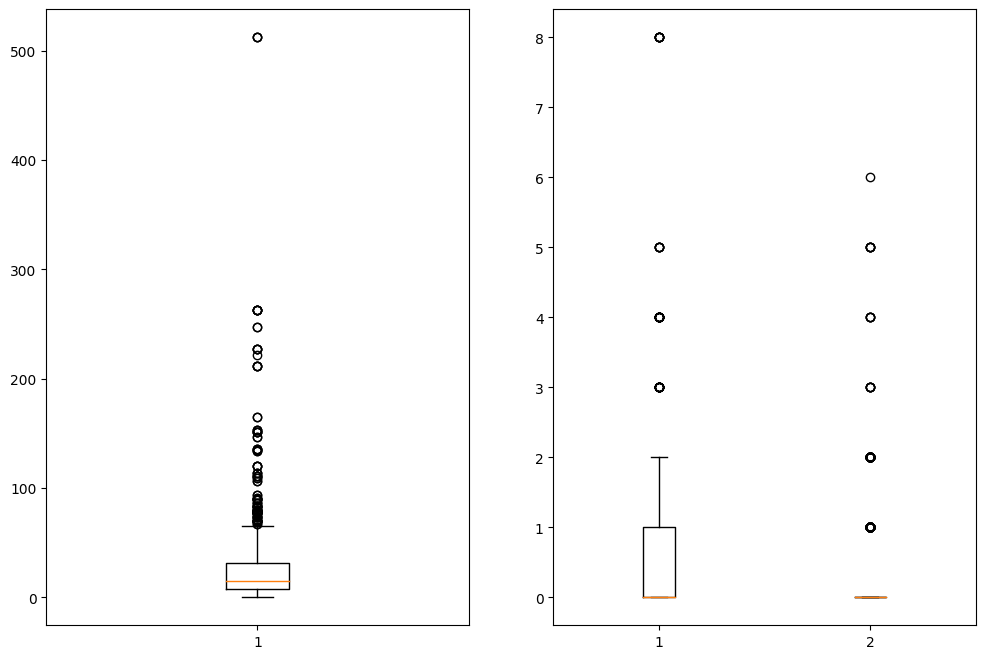

In [161]:
#Verificando das colunas SibSp e Parch
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].boxplot(base.Fare)
ax[1].boxplot([base.SibSp, base.Parch])
plt.show()

In [162]:
#Verificando o value_counts()
base.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [163]:
#Verificando o resumo estatístico para a coluna Parch
base.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [164]:
#Verificando o value_counts()
base.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [165]:
#Verificando o resumo estatístico para da coluna SibSp
base.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [166]:
base.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

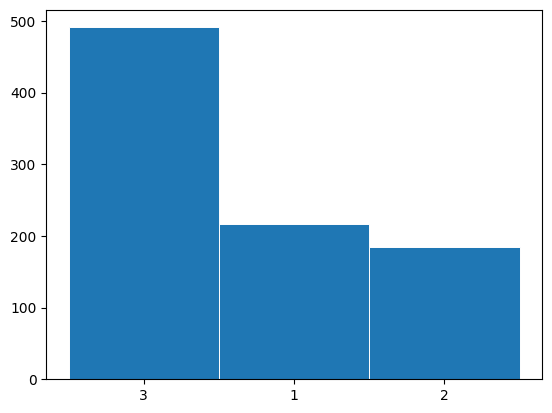

In [167]:
#Gerando gráfico de quantidade de pessoas por classe em ordem decrescente
fig, ax = plt.subplots()

x=base.Pclass.value_counts().index.astype('str')
y=base.Pclass.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

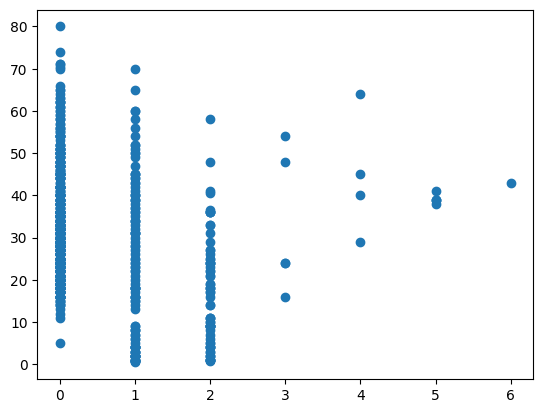

In [168]:
#Verificando se existe relação entre a coluna Parch e a idade
fig, ax = plt.subplots()

x=base.Parch
y=base.Age

ax.scatter(x,y)

plt.show()

**Criando uma matriz para mostrar a correlação de cada par de variáveis**

array([[<Axes: xlabel='PassengerId', ylabel='PassengerId'>,
        <Axes: xlabel='Survived', ylabel='PassengerId'>,
        <Axes: xlabel='Pclass', ylabel='PassengerId'>,
        <Axes: xlabel='Age', ylabel='PassengerId'>,
        <Axes: xlabel='SibSp', ylabel='PassengerId'>,
        <Axes: xlabel='Parch', ylabel='PassengerId'>,
        <Axes: xlabel='Fare', ylabel='PassengerId'>],
       [<Axes: xlabel='PassengerId', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>],
       [<Axes: xlabel='PassengerId', ylabel='Pclass'>,
        <Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass

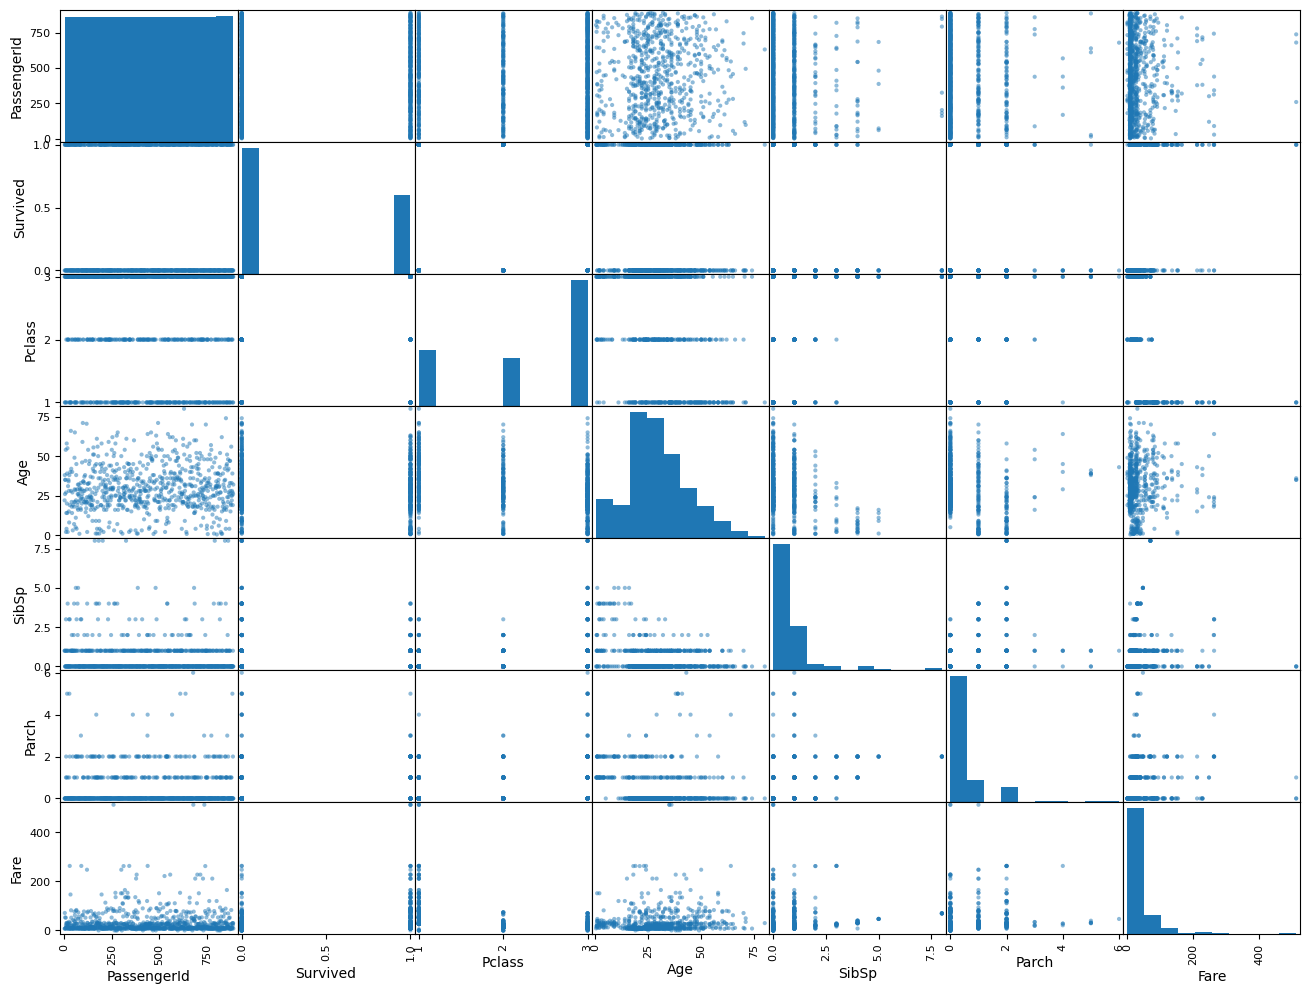

In [169]:
#Utilizando o pandas
pd.plotting.scatter_matrix(base,figsize=(16,12))

<function matplotlib.pyplot.show(close=None, block=None)>

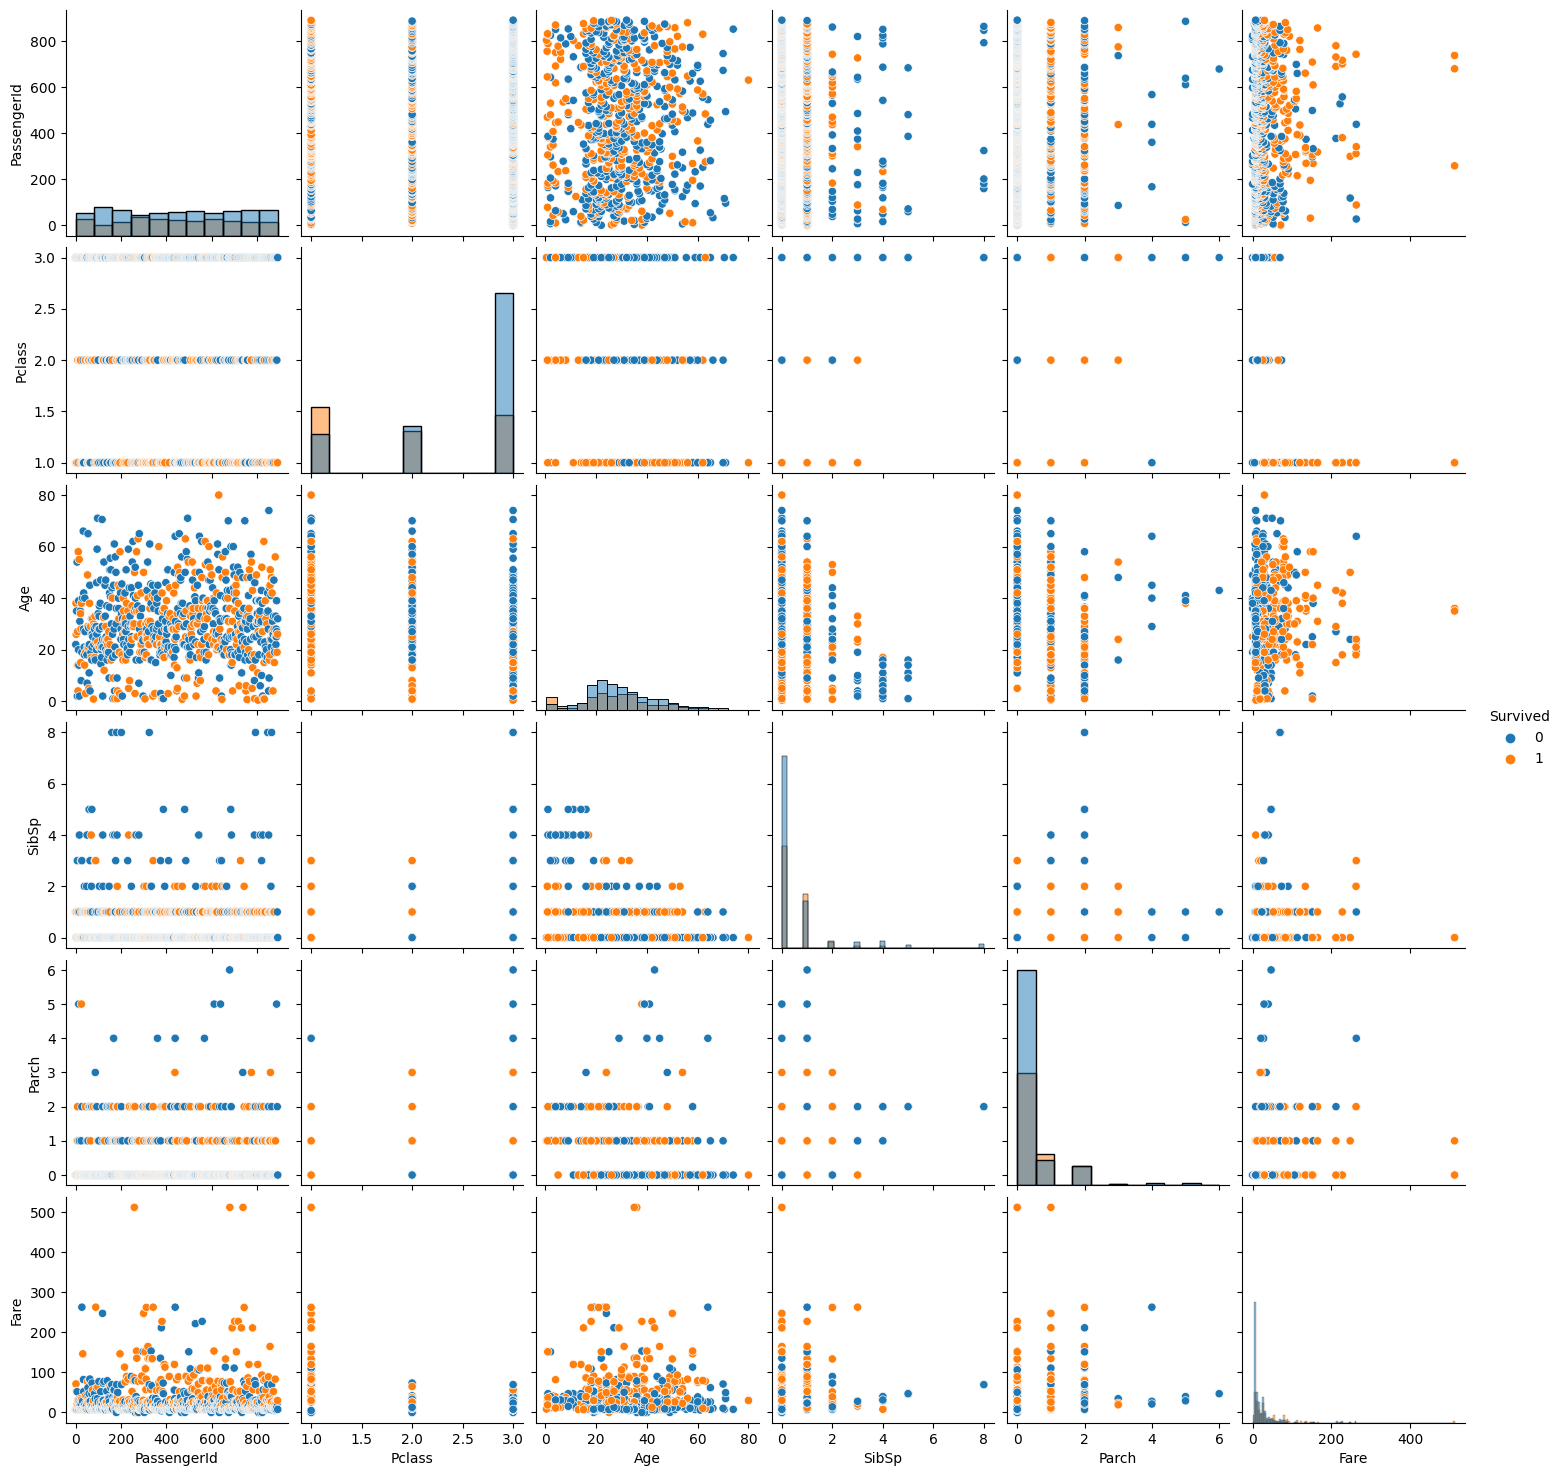

In [170]:
#Utilizando seaborn
sns.pairplot(base,hue='Survived', diag_kind='hist')
plt.show

Na primeira e segunda classe mais da metade das pessoas sobreviveram. Já na terceira classe vemos que mais da metade não sobreviveu

**Heatmap de correlação**

In [171]:
#Verificando a correlação entre os dados
base.corr()

<ipython-input-171-52d79273be56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Apresentando o heatmap**

<ipython-input-172-7a339931e844>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(),annot=True, cmap="coolwarm")


<function matplotlib.pyplot.show(close=None, block=None)>

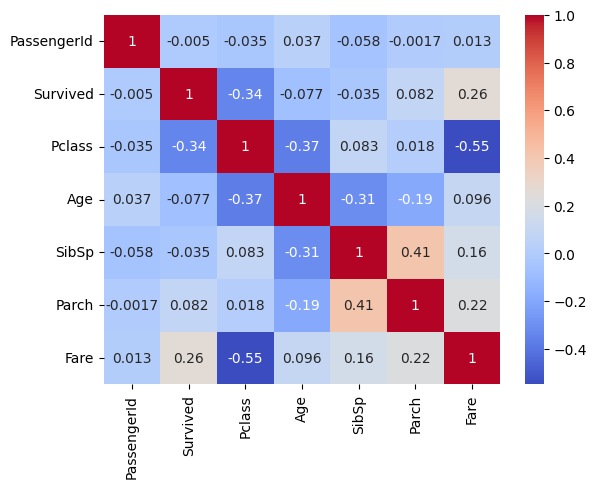

In [172]:
sns.heatmap(base.corr(),annot=True, cmap="coolwarm")
plt.show

Existe uma correlação muito forte entre Pclass e Fare, que provavelmente, mostra a condição econômica do passageiro. Quanto maior o valor pago na tarifa, menor é a classe, porque a primeira classe tem o maior valor de tarifa. A terceira classe é inversamente proporcional em Fare (Tarifa), quanto menor o valor pago, maior é a classe. Neste caso vemos que uma correlação positiva gera o crescimento da outra vairável, uma correlação negativa gera o descrescimento da outra variável.


**Tratando valores vazios e outliers**

Entendendo os outliers

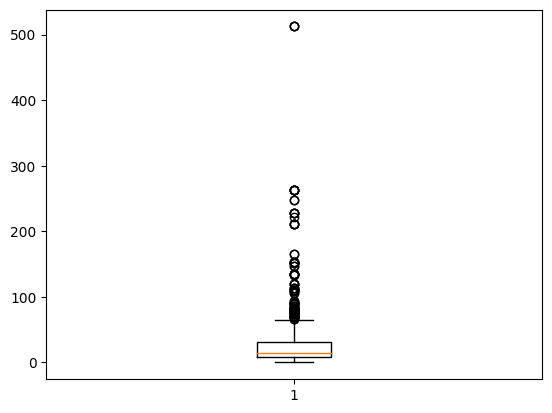

In [173]:
#Verificando a coluna Fare
fig, ax = plt.subplots()
ax.boxplot(base.Fare)
plt.show()

Podemos ver pelo boxplot que há valores muito altos acima de 300.

In [174]:
#Filtando apenas para esse valor muito maior que os demais
base[base.Fare > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Temos apenas três valores, embarcaram no mesmo porto, eram da primeira classe e sobreviveram.
Aprofundando a pesquisa, se buscarmos informações sobre Cardeza, Mr. Thomas Drake Martinez, encontramos no link:

https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html?%3E#biography

Há evidências de que faz sentido que ele tenha pago, realmente, 512,3292 Libras, pois ele, sua mãe e seu criado ocuparam uma das duas cabines mais luxuosas a bordo (B51/3/5, passagem 17755).


In [175]:
#Verificando se alguém pagou um valor muito baixo
base[base.Fare < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Entendendo os valores nulos

In [176]:
#Calculando a média de Fare
mean_Fare = base.Fare.mean()

Visto que haviam muitos valores zerados, faz mais sentido buscarmos a média dos valores das tarifas cobradas para substituirmos os valores zerados (Pois, deduz-se que é pela ausência de de registro e não que a viagem foi gratuita para esses passageiros).

In [177]:
#Vizualizando a base como está
base.loc[base.Fare < 1, 'Fare']

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

In [178]:
#Substituindo esses valores
base.loc[base.Fare < 1, 'Fare'] = mean_Fare
print(mean_Fare)

base.loc[base.Fare < 1, 'Fare']

32.204207968574636


Series([], Name: Fare, dtype: float64)

Como não temos a informação de que estes passageiros ganharam, entendemos que não faz sentido o valor ser igual e zero, por isso substituimos pela média dos valores pagos.

In [179]:
#Verificando valores nulos em Age
base[base.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [180]:
#Entendendo melhor os valores nulos
base.loc[base.Age.isnull(),'Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

Há uma concentração maior de ausência de informação sobre as pessoas falecidas.
Por ser um fato histórico e não temos como confirmar, iremos assumir algumas premissas.
A informação de idade pode ter sido coletada após o acidente, em casos onde nenhum familiar se pronunciou sobre a ausência do falecido, pode ter ficado sem esta informação.
Iremos substituir os valores nulos pela média das idades.

Substituindo pela média das idades

In [181]:
#Calculando a média das idades
base.Age.mean()

29.69911764705882

In [182]:
#Verificando valores nulos presentes na base
base.loc[base.Age.isnull(),'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [183]:
#Substituindo os valores nulos por essa média
base.loc[base.Age.isnull(),'Age'] = base.Age.mean()

In [184]:
#Verificando novamente a base
base[base.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [185]:
#Verificando se ainda existe algum valor nulo na base
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Na coluna Cabin temos 687 valores nulos e como esse não é um dado relevante nesta análise, vamos excluí-la

In [186]:
#Redução de dimensionalidade (coluna Cabin)
base.drop(['Cabin'], axis=1, inplace=True)

In [187]:
#Verificando a base após a redução de dimensionalidade
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [188]:
#Verificação linhas duplicadas
duplicadas = base.duplicated()
tem_duplicadas = duplicadas.any()
print(tem_duplicadas)


False


Não temos linhas duplicadas. Por tanto, não aplicaremos o tratamento para esse tipo de problema. Mas deixarei um exemplo de aplicação para a resolução:

```
base_sem_duplicatas = base.drop_duplicates()
```


Também deixarei a solução para uma integração de dados hipotética:

Carregamento dos dataFrames
```
base0 = pd.read_csv('train.csv')
base1 = pd.read_csv('test.csv')
```

Integração pela coluna Pessenger ID
```
coluna_comum = 'PassengerId'
dados_integrados = pd.merge(base0,base1, on='PassengerId', how='Inner')
```

